### HW 7-2 尋找資料夾照片

In [1]:
import os

In [2]:
def check_or_create_directory(directory_path):
    if not os.path.exists(directory_path):
        # 創建資料夾
        os.makedirs(directory_path)
    # 資料夾存在

def files_in_directory(directory_path):
    files = os.listdir(directory_path)
    # 只抓檔案(略過資料夾)
    files = [file for file in files if os.path.isfile(os.path.join(directory_path, file))]
    return files

In [3]:
set_cat_image_path = "C:\\Users\\zombie\\PycharmProjects\\DL_class\\image_cat"
saved_cat_path = "C:\\Users\\zombie\\PycharmProjects\\DL_class\\saved_testimg_cat"
set_dog_image_path = "C:\\Users\\zombie\\PycharmProjects\\DL_class\\image_dog"
saved_dog_path = "C:\\Users\\zombie\\PycharmProjects\\DL_class\\saved_testimg_dog"

In [4]:
check_or_create_directory(saved_cat_path)
check_or_create_directory(saved_dog_path)
cat_image_list = files_in_directory(set_cat_image_path)
dog_image_list = files_in_directory(set_dog_image_path)
print("success 讚啦OuOb")

success 讚啦OuOb


### HW 7-3 轉換照片

In [5]:
from PIL import Image

In [6]:
def convert_image(input_directory_path, output_directory_path):
    check_or_create_directory(output_directory_path)
    image_list = files_in_directory(input_directory_path)
    for img_name in image_list:
        img = Image.open(os.path.join(input_directory_path, img_name))
        square_img = img.resize((28, 28))
        grey_img = square_img.convert("L")
        grey_img.save(os.path.join(output_directory_path, img_name))

In [7]:
convert_image(set_cat_image_path, saved_cat_path)
convert_image(set_dog_image_path, saved_dog_path)

### HW 7-4 轉換輸入資料

In [8]:
import os
import numpy as np
from PIL import Image

In [9]:
x_train = []
y_train = []

In [10]:
dog_image_path = "C:\\Users\\zombie\\PycharmProjects\\DL_class\\saved_testimg_dog"
dog_image_list = files_in_directory(dog_image_path)
for img_name in dog_image_list:
    img = Image.open(os.path.join(dog_image_path, img_name))
    x_data = np.array(img)
    x_train.append(x_data)
    y_train.append(0)

### HW 7-5 轉換輸出入資料

In [11]:
cat_image_path = "C:\\Users\\zombie\\PycharmProjects\\DL_class\\saved_testimg_cat"
cat_image_list = files_in_directory(cat_image_path)
for img_name in cat_image_list:
    img = Image.open(os.path.join(cat_image_path, img_name))
    x_data = np.array(img)
    x_train.append(x_data)
    y_train.append(1)

In [12]:
print(y_train)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [13]:
from keras.utils import np_utils

In [14]:
x_train = np.array(x_train)
x_train_norm = (x_train.reshape(20, 784).astype('float32'))/255
y_train_OneHot = np_utils.to_categorical(y_train)

print(x_train_norm[13])
print(y_train_OneHot[13])

[0.6862745  0.64705884 0.6745098  0.7254902  0.7137255  0.7019608
 0.73333335 0.7490196  0.7529412  0.78039217 0.7921569  0.7764706
 0.7882353  0.8235294  0.83137256 0.8156863  0.8392157  0.84313726
 0.8509804  0.85882354 0.85882354 0.85490197 0.84705883 0.8392157
 0.8392157  0.83137256 0.81960785 0.80784315 0.7058824  0.64705884
 0.654902   0.6862745  0.6784314  0.6901961  0.74509805 0.7764706
 0.78039217 0.79607844 0.79607844 0.7921569  0.8039216  0.827451
 0.8235294  0.79607844 0.8235294  0.827451   0.8392157  0.84705883
 0.84705883 0.84705883 0.84313726 0.8392157  0.8352941  0.83137256
 0.81960785 0.80784315 0.7372549  0.68235296 0.68235296 0.70980394
 0.7058824  0.73333335 0.7921569  0.81960785 0.79607844 0.8
 0.8039216  0.81960785 0.8352941  0.827451   0.78039217 0.73333335
 0.80784315 0.8156863  0.827451   0.8352941  0.84313726 0.84313726
 0.84313726 0.84313726 0.8392157  0.83137256 0.8235294  0.8156863
 0.75686276 0.7176471  0.73333335 0.76862746 0.76862746 0.7882353
 0.8235294

### HW 7-6 訓練類神經網路

In [15]:
from keras.models import Sequential
from keras.layers import Dense

In [16]:
# 建立模型
maudel = Sequential()
maudel.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
maudel.add(Dense(units=2, kernel_initializer='normal', activation='softmax'))
# 訓練
maudel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
maudel.fit(x=x_train_norm, y=y_train_OneHot, validation_split=0.2, epochs=10, batch_size=5, verbose=2)
# 儲存模型
maudel.save('my_maudel.h5')

Epoch 1/10
4/4 - 1s - loss: 1.1614 - accuracy: 0.4375 - val_loss: 0.9642 - val_accuracy: 0.0000e+00 - 818ms/epoch - 204ms/step
Epoch 2/10
4/4 - 0s - loss: 0.7670 - accuracy: 0.5000 - val_loss: 0.5257 - val_accuracy: 1.0000 - 46ms/epoch - 11ms/step
Epoch 3/10
4/4 - 0s - loss: 0.5984 - accuracy: 0.7500 - val_loss: 2.1005 - val_accuracy: 0.0000e+00 - 40ms/epoch - 10ms/step
Epoch 4/10
4/4 - 0s - loss: 0.8245 - accuracy: 0.6250 - val_loss: 2.2679 - val_accuracy: 0.0000e+00 - 67ms/epoch - 17ms/step
Epoch 5/10
4/4 - 0s - loss: 0.6211 - accuracy: 0.8125 - val_loss: 1.0277 - val_accuracy: 0.5000 - 91ms/epoch - 23ms/step
Epoch 6/10
4/4 - 0s - loss: 0.5023 - accuracy: 0.6875 - val_loss: 0.5578 - val_accuracy: 0.7500 - 52ms/epoch - 13ms/step
Epoch 7/10
4/4 - 0s - loss: 0.6005 - accuracy: 0.6875 - val_loss: 0.7641 - val_accuracy: 0.5000 - 62ms/epoch - 15ms/step
Epoch 8/10
4/4 - 0s - loss: 0.4318 - accuracy: 0.8750 - val_loss: 1.2637 - val_accuracy: 0.0000e+00 - 77ms/epoch - 19ms/step
Epoch 9/10
4/4

### HW 7-7 辨識圖形

In [19]:
from keras.models import load_model
model = load_model('my_maudel.h5')

In [20]:
my_img = Image.open("image_dog\\003.jpg")
resize_img = my_img.resize((28, 28))
img_array = np.array(resize_img.convert("L")) # img_reshape.shape == (28, 28)
img_reshape = img_array.reshape(1, 28*28) # img_reshape.shape == (1, 784)
img_x = img_reshape.astype('float32')/255

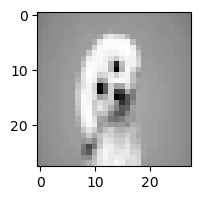

In [21]:
# show image
from PIL import Image
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(2,2)
plt.imshow(img_array, cmap=plt.get_cmap('gray'))

In [22]:
predict = model.predict(img_x)
prediction = np.argmax(predict,axis=1)
print(predict)
print("result = ", prediction)
if prediction == [0]:
    print("他是一隻狗勾")
if prediction == [1]:
    print("他是一隻卯咪")

1/1 [==============================] - 0s 65ms/step
[[0.8607733  0.13922669]]
result =  [0]
他是一隻狗勾
